In [49]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel pingouin fastapi pydantic streamlit uvicorn requests

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Carregar o dataset
df_salario = pd.read_csv('./datasets/dataset.csv')

In [51]:
# Checar a estrutura do dataset
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [52]:
# Copiar o dataframe para o df eda
df_salario_eda = df_salario.copy()

In [53]:
# Copiar o dataframe  para o df bucketing
df_salario_bucketing= df_salario.copy()

## EDA

In [54]:
# Visualizar os dados
df_salario_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [55]:
# Detectar Valores ausentes
df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [56]:
# Medidas estatisticas
df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


Já podemos notar que o salario em reais existe uma grande distancia entre a média e a mediana, indicando talvez uma não linearidade

<Axes: xlabel='tempo_na_empresa'>

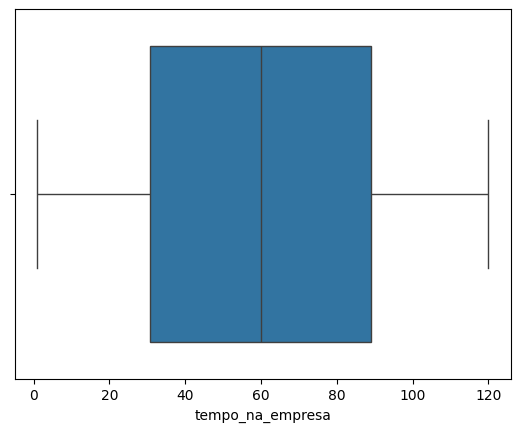

In [57]:
# Verificar / Detectar Outliers
sns.boxplot(data=df_salario_eda, x='tempo_na_empresa')

Equilibrado

<Axes: xlabel='nivel_na_empresa'>

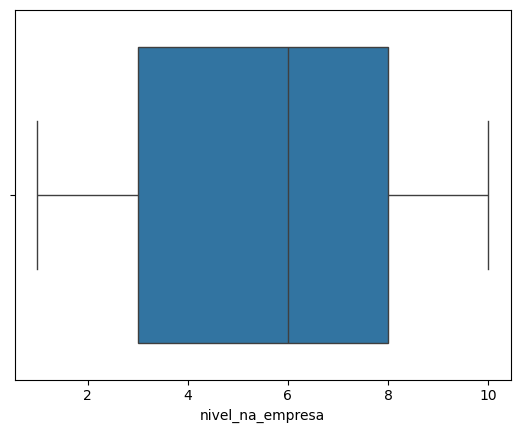

In [58]:
# Verificar / Detectar Outliers
sns.boxplot(data=df_salario_eda, x='nivel_na_empresa')

Mediana mais próxima do nivel 6, sem outliers

<Axes: xlabel='salario_em_reais'>

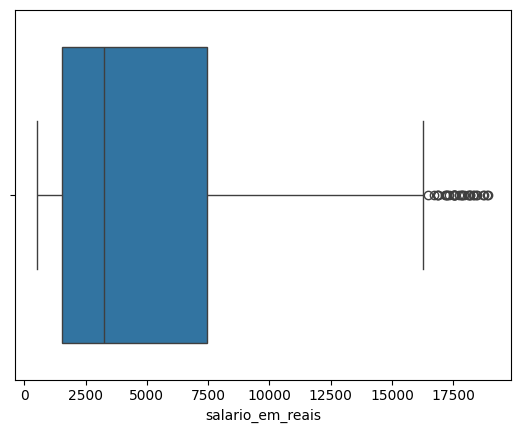

In [59]:
# Verificar / Detectar Outliers
sns.boxplot(data=df_salario_eda, x='salario_em_reais')

Decidimos não remover os outliers por que os dados estão corretos segundo o fornecedor dos dados

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

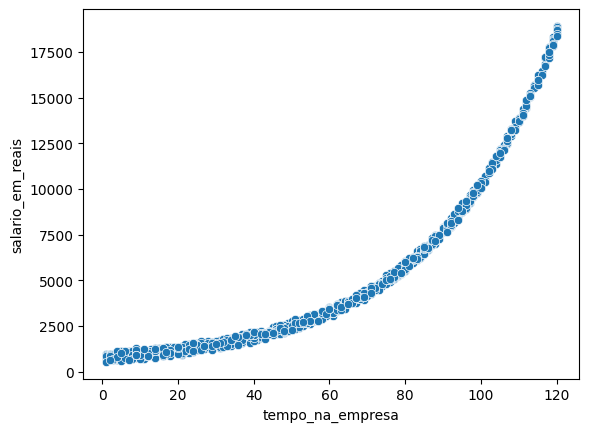

In [60]:
# Cruzamento variáveis numericas com a variável target (salario_em_reais)
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

Notamos que o cruzamento mostra uma curva, não é uma reta. É um indicativo que uma regressão linear provavelmente traria um nível de erro muito grande.

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

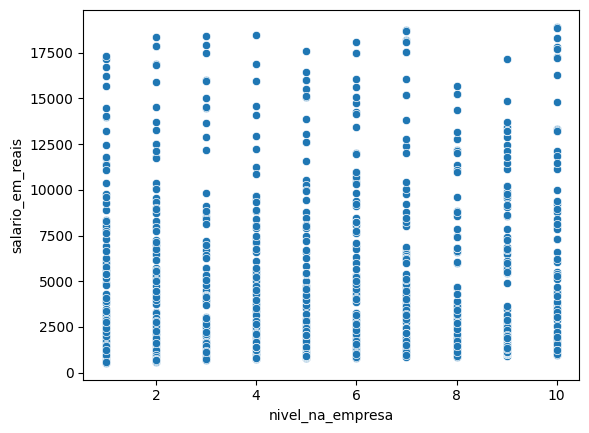

In [61]:
# Cruzamento variáveis numericas com a variável target (salario_em_reais)
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

Não tem um padrão, parece bem uniforme. Aparentemente o nivel da empresa nao impacta muito o salario

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

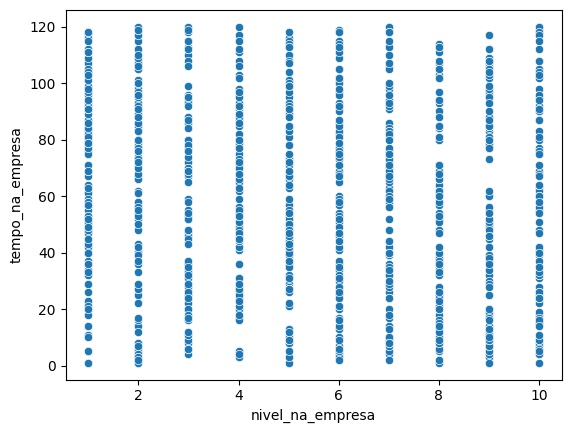

In [62]:
# Cruzamento variáveis numericas independentes entre si
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='tempo_na_empresa')

Uniforme

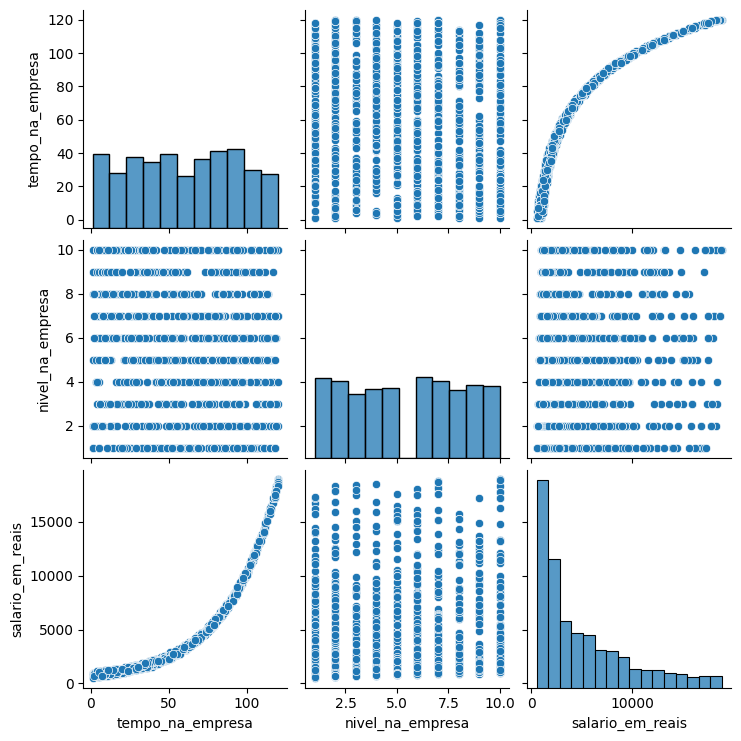

In [63]:
# Histogramas das variáveis numericas
sns.pairplot(df_salario_eda)

Visão geral

<Axes: >

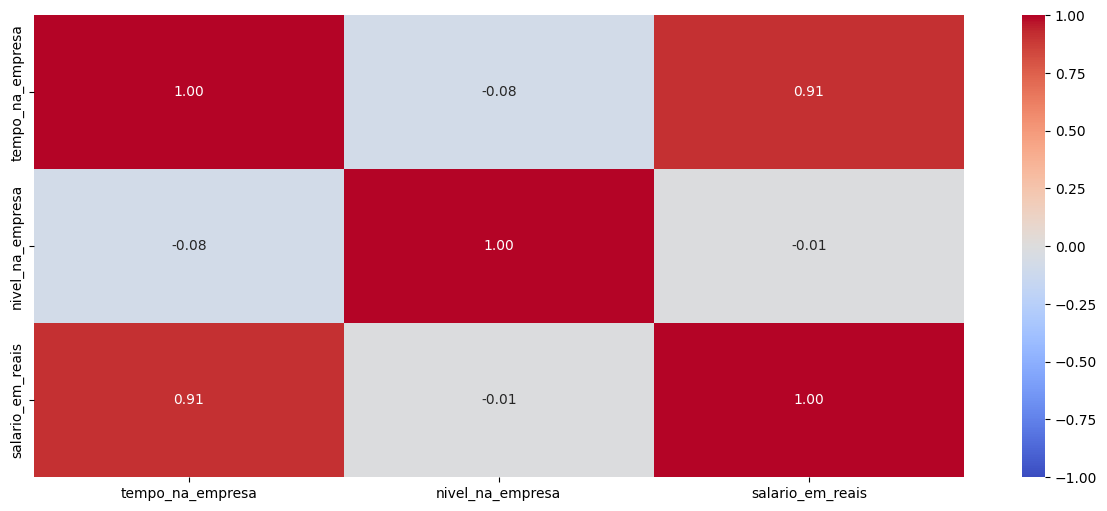

In [64]:
# Mapa de calor
plt.figure(figsize=(15, 6))
sns.heatmap(df_salario_eda.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')

Mesmo com pearson (mais usado em lineares) é possivel ver uma correlação com salario e tempo na empresa

<Axes: >

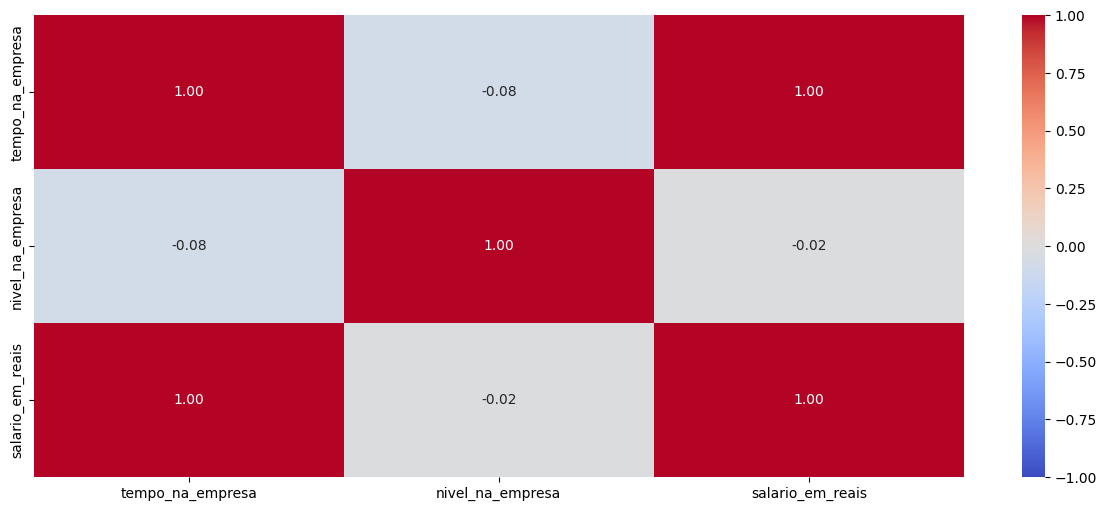

In [65]:
# Mapa de calor spearmann
plt.figure(figsize=(15, 6))
sns.heatmap(df_salario_eda.corr('spearman'), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')

Com spearman é possivel ver claramente que não é linear a correlação

<Axes: >

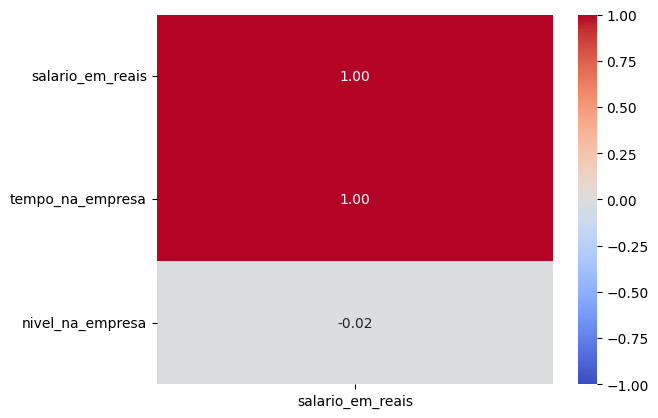

In [66]:
# Formato ranking
sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending=False), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')

Nivel na empresa parece que nao importa muito pro salario, ja o tempo na empresa é praticamente perfeito a correlação

### Bucketing 

In [67]:
# Bucketing no Tempo na Empresa
bins_tempo_na_empresa = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]
labels_tempo_na_empresa = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-109','110-119','120-129']
df_salario_bucketing['escala_tempo'] = pd.cut(df_salario_bucketing['tempo_na_empresa'], bins=bins_tempo_na_empresa, labels=labels_tempo_na_empresa, include_lowest=True)

In [68]:
# Checar o resultado
df_salario_bucketing.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
5,105,10,12102.18,100-109
6,80,3,5723.35,70-79
7,85,2,6424.92,80-89
8,66,5,3916.18,60-69
9,73,5,4751.79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

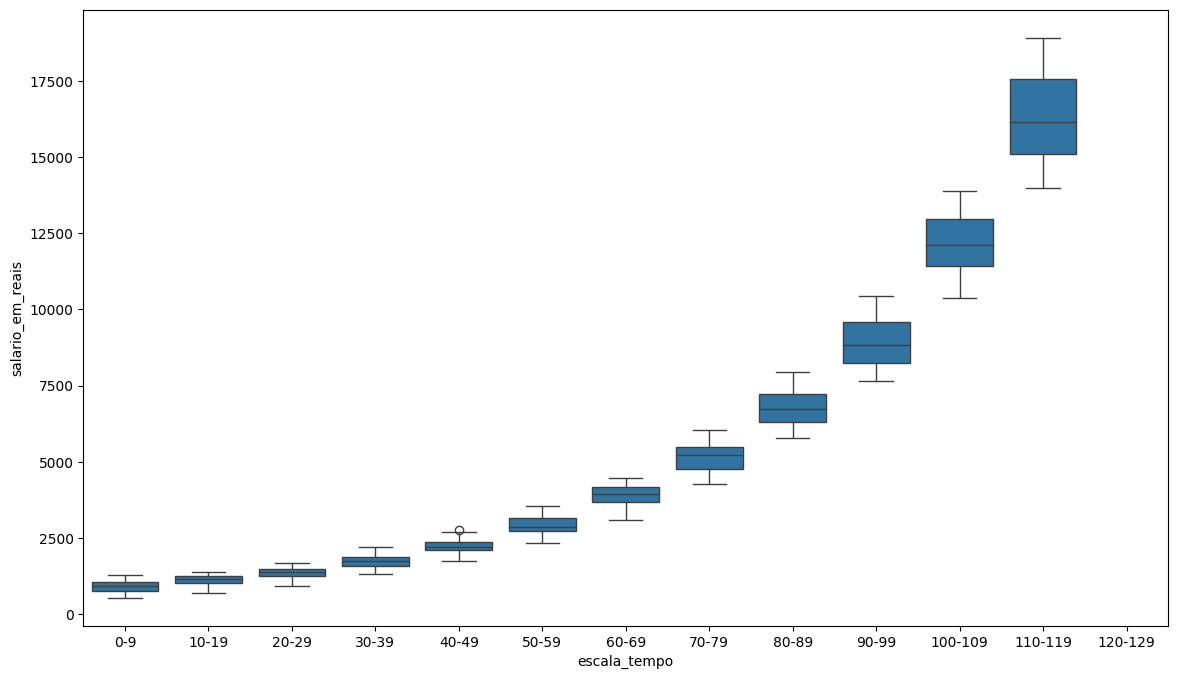

In [69]:
# Boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_salario_bucketing, x='escala_tempo', y='salario_em_reais')

## Treinamento Modelo Linear

In [78]:
# Importar as bibliotecas
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, r2_score

import numpy as np

In [71]:
# Criar o dataset de treino e teste
X = df_salario.drop(columns=['salario_em_reais'], axis=1)
y = df_salario['salario_em_reais']

In [72]:
# Split usando o KFold com 5 folds/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [87]:
# Bloco para treinamento do modelo

# Pipeline
# Padronizar variáveis numericas - tempo_na_empresa e nivel_na_empresa

# Nomes das Colunas
colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformer para Colunas Numericas
transformer_numerico = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criar um ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numerico', transformer_numerico, colunas_numericas)
])

# Criar o pipeline principal
model_regr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Armanezar os resultados RMSE de treino e teste
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar os resultados R2 de teste
r2_scores_fold_test = []

# Armazenar os residuos
residuos = []

# Armazenar as predições
y_pred_total = []

# Loop para treinamento e teste do modelo
for train_index, test_index in kf.split(X):

    # Pegar os dados de treino e teste do fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    model_regr.fit(X_train, y_train)

    # Fazer as predições
    y_train_pred = model_regr.predict(X_train)
    y_test_pred = model_regr.predict(X_test)

    # Calcular o RMSE de treino e teste
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    r2_score_test = r2_score(y_test, y_test_pred)
    # Calcular os residuos
    residuos_test = np.array(y_test - y_test_pred)

    # Armazenar os resultados
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2_scores_fold_test.append(r2_score_test)

    # Armazenar os residuos
    residuos.append(y_test - y_test_pred)

    # Armazenar as predições
    y_pred_total.append(y_test_pred)

# Calcular a média dos resultados
rmse_train_mean = np.mean(rmse_scores_fold_train)
rmse_test_mean = np.mean(rmse_scores_fold_test)
r2_scores_mean = np.mean(r2_scores_fold_test)
percentual_rmse = ((rmse_test_mean / rmse_train_mean) / rmse_train_mean) * 100

# Transformar os resultados em arrays
residuos = np.array(residuos).flatten()
y_pred_total = np.array(y_pred_total).flatten()

## Análise de Métricas - Modelo Linear

In [89]:
# Mostrar os resultados
print(f'RMSE Médio de Treino: {rmse_train_mean}')
print(f'RMSE Médio de Teste: {rmse_test_mean}')
print(f'Percentual RMSE: {percentual_rmse}')
print(f'R2 Médio de Teste: {r2_scores_mean}')



RMSE Médio de Treino: 1882.8318426651392
RMSE Médio de Teste: 1886.4504221336076
Percentual RMSE: 0.05321356154494577
R2 Médio de Teste: 0.8261178870584761


Podemos ver que não parece ter tido problema de overfiting pois o rmse de treino e de teste estão parecidos

### Análise de residuos

In [91]:
# Transformar os residuos na escala padrao
# (X - X.mean()) / X.std()
from scipy.stats import zscore
residuos_std = zscore(residuos)

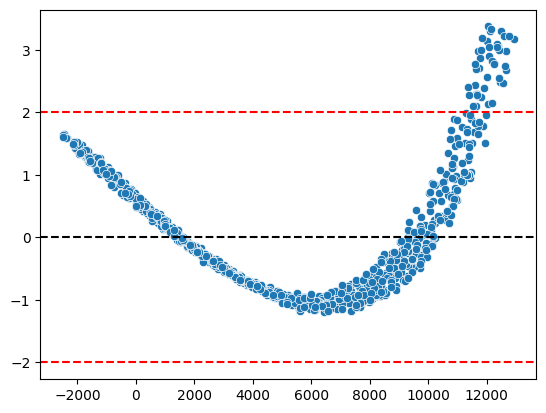

In [93]:
# Verificar a linearidade dos residuos, valores esperados entre -2 e 2
# Vamos verificar a homocedasticidade dos residuos: Valores em torno da reta sem nehuma tendencia ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(2, color='r', linestyle='--')
plt.axhline(-2, color='r', linestyle='--')
plt.axhline(0, color='black', linestyle='--')

Notamos que não há linearidade e nem homocedasticidade, os valores tem uma tendencia e formato

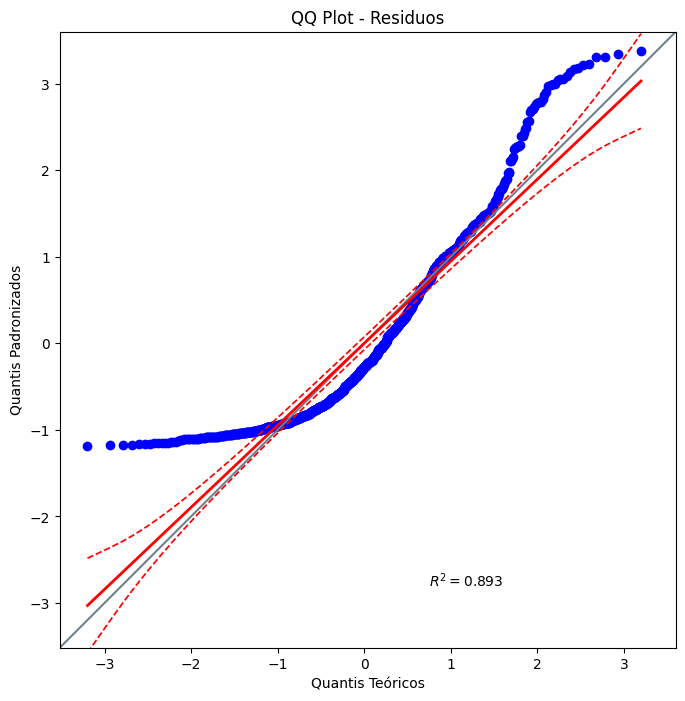

In [94]:
# Checar se residuos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14, 8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Padronizados')
plt.title('QQ Plot - Residuos')
plt.show()

Os valores não estão bem posicionados na reta, muitos valores escapando a banda de segurança, notamos tambem um formato em curva.

In [97]:
# Teste de normalidade Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

# Teste de Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(residuos)
print(f'Shapiro-Wilk: Estatistica: {stat_shapiro}, P-value:{p_shapiro}')

Shapiro-Wilk: Estatistica: 0.891969217965228, P-value:7.013497918013492e-26


P-value menor que 0,05, os residuos não seguem uma distribuição normal

In [98]:
# Teste de Kolmogorov-Smirnov
stat_kstest, p_kstest = kstest(residuos, 'norm')
print(f'Kolmogorov-Smirnov: Estatistica: {stat_kstest}, P-value:{p_kstest}')

Kolmogorov-Smirnov: Estatistica: 0.5939999999999955, P-value:0.0


P-value abaixo também, afirmamos que os residuos não seguem uma distribuição normal

In [100]:
# Teste de Lilliefors
stat_lilliefors, p_lilliefors = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f'Lilliefors: Estatistica: {stat_lilliefors}, P-value:{p_lilliefors}')

Lilliefors: Estatistica: 0.11825983774680088, P-value:0.0009999999999998899


P-value também menor que 0,05, não seguem uma distribuição normal.

## Treinamento Modelo Polinomial

In [102]:
# Exemplo de criação de features polinomiais
feat_poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = feat_poly.fit_transform(X)
feat_poly.feature_names_in_

array(['tempo_na_empresa', 'nivel_na_empresa'], dtype=object)

In [105]:
feat_poly.get_feature_names_out()

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

In [106]:
# Bloco para treinamento do modelo polinomial

# Vamos treinar 10 modelos com 10 composições polinomiais diferentes 
# e ainda vamos treinar com validaçao cruzada
graus_pol = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Armazenar os resultados RMSE de treino e teste de todos os graus polinomiais
rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2_scores_test_values = []

# Slipt de treino e teste usando o KFold
kf = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_pol:
    # Pipeline
    # Padronizar variáveis numericas - tempo_na_empresa e nivel_na_empresa

    # Nomes das Colunas
    colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

    # Transformer para Colunas Numericas
    transformer_numerico = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Criar um ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('numerico', transformer_numerico, colunas_numericas)
    ])

    # Criar features polinomiais
    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    # Criar o pipeline principal
    model_poly = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly_features', poly_feat),
        ('regressor', LinearRegression())
    ])

    # Armanezar os resultados RMSE de treino e teste
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # Armazenar os resultados R2 de teste
    r2_scores_fold_test = []

    # Armazenar os residuos
    residuos = []

    # Armazenar as predições
    y_pred_total = []

    # Loop para treinamento e teste do modelo
    for train_index, test_index in kf.split(X):

        # Pegar os dados de treino e teste do fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Treinar o modelo
        model_poly.fit(X_train, y_train)

        # Fazer as predições
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        # Calcular o RMSE de treino e teste
        rmse_train = root_mean_squared_error(y_train, y_train_pred)
        rmse_test = root_mean_squared_error(y_test, y_test_pred)
        r2_score_test = r2_score(y_test, y_test_pred)
        # Calcular os residuos
        residuos_test = np.array(y_test - y_test_pred)

        # Armazenar os resultados
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2_scores_fold_test.append(r2_score_test)

        # Armazenar os residuos
        residuos.append(y_test - y_test_pred)

        # Armazenar as predições
        y_pred_total.append(y_test_pred)

    # Calcular a média dos resultados
    rmse_train_mean = np.mean(rmse_scores_fold_train)
    rmse_test_mean = np.mean(rmse_scores_fold_test)
    r2_scores_mean = np.mean(r2_scores_fold_test)
    percentual_rmse = ((rmse_test_mean / rmse_train_mean) / rmse_train_mean) * 100

    # Transformar os resultados em arrays
    residuos = np.array(residuos).flatten()
    y_pred_total = np.array(y_pred_total).flatten()

    # Armazenar os resultados por grau polinomial
    rmse_train_values.append(rmse_train_mean)
    rmse_test_values.append(rmse_test_mean)
    percentual_rmse_values.append(percentual_rmse)
    r2_scores_test_values.append(r2_scores_mean)

### Análise Gráfica para achar o grau Polinomial

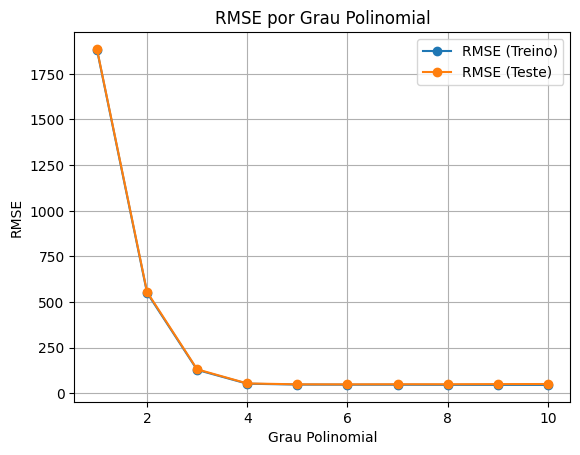

In [109]:
# Plotar grafico para comparar RMSE por grau polinomial
plt.plot(graus_pol, rmse_train_values, marker='o', label='RMSE (Treino)')
plt.plot(graus_pol, rmse_test_values, marker='o', label='RMSE (Teste)')
plt.xlabel('Grau Polinomial')
plt.ylabel('RMSE')
plt.title('RMSE por Grau Polinomial')
plt.legend()
plt.grid(True)
plt.show()

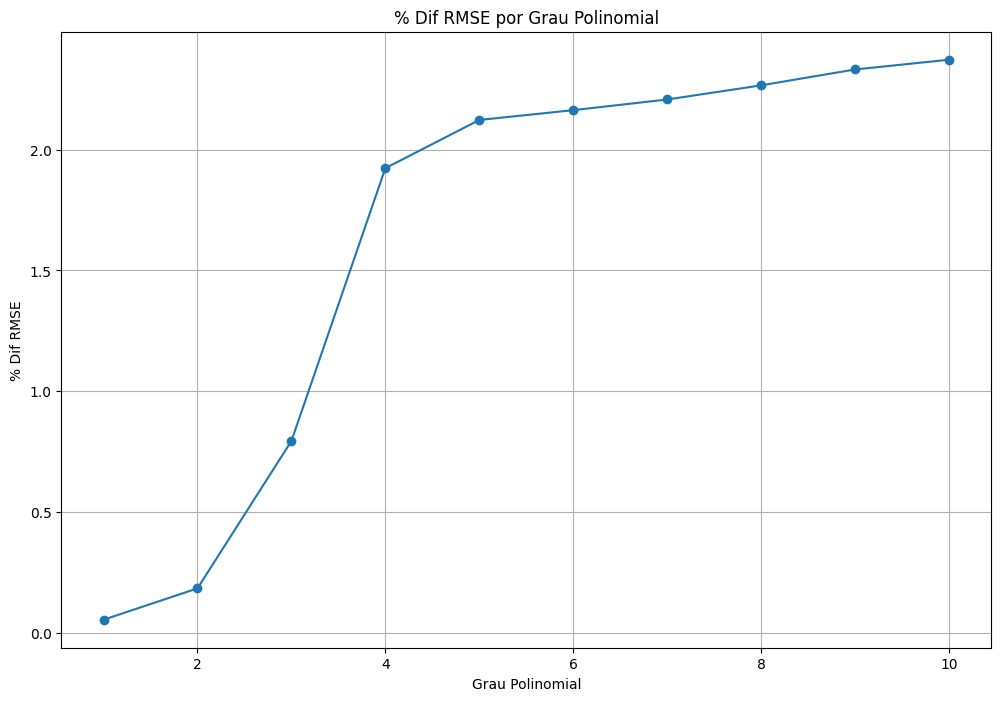

In [114]:
# Plotar grafico para comparar % de diferença RMSE por grau polinomial
plt.figure(figsize=(12, 8))
plt.plot(graus_pol, percentual_rmse_values, marker='o', label='% Dif RMSE (Trei/Teste)')
plt.xlabel('Grau Polinomial')
plt.ylabel('% Dif RMSE')
plt.title('% Dif RMSE por Grau Polinomial')
plt.grid(True)
plt.show()

Podemos ver que vamos utilizar o grau de polinomio 4, por ficar estável os RMSE

In [116]:


# Vamos utilizar o grau 4 como visto para treinar novamente.
graus_pol = [4]

# Armazenar os resultados RMSE de treino e teste de todos os graus polinomiais
rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2_scores_test_values = []

# Slipt de treino e teste usando o KFold
kf = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_pol:
    # Pipeline
    # Padronizar variáveis numericas - tempo_na_empresa e nivel_na_empresa

    # Nomes das Colunas
    colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

    # Transformer para Colunas Numericas
    transformer_numerico = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Criar um ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('numerico', transformer_numerico, colunas_numericas)
    ])

    # Criar features polinomiais
    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    # Criar o pipeline principal
    model_poly = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly_features', poly_feat),
        ('regressor', LinearRegression())
    ])

    # Armanezar os resultados RMSE de treino e teste
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # Armazenar os resultados R2 de teste
    r2_scores_fold_test = []

    # Armazenar os residuos
    residuos = []

    # Armazenar as predições
    y_pred_total = []

    # Loop para treinamento e teste do modelo
    for train_index, test_index in kf.split(X):

        # Pegar os dados de treino e teste do fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Treinar o modelo
        model_poly.fit(X_train, y_train)

        # Fazer as predições
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        # Calcular o RMSE de treino e teste
        rmse_train = root_mean_squared_error(y_train, y_train_pred)
        rmse_test = root_mean_squared_error(y_test, y_test_pred)
        r2_score_test = r2_score(y_test, y_test_pred)
        # Calcular os residuos
        residuos_test = np.array(y_test - y_test_pred)

        # Armazenar os resultados
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2_scores_fold_test.append(r2_score_test)

        # Armazenar os residuos
        residuos.append(y_test - y_test_pred)

        # Armazenar as predições
        y_pred_total.append(y_test_pred)

    # Calcular a média dos resultados
    rmse_train_mean = np.mean(rmse_scores_fold_train)
    rmse_test_mean = np.mean(rmse_scores_fold_test)
    r2_scores_mean = np.mean(r2_scores_fold_test)
    percentual_rmse = ((rmse_test_mean / rmse_train_mean) / rmse_train_mean) * 100

    # Transformar os resultados em arrays
    residuos = np.array(residuos).flatten()
    y_pred_total = np.array(y_pred_total).flatten()

    # Armazenar os resultados por grau polinomial
    rmse_train_values.append(rmse_train_mean)
    rmse_test_values.append(rmse_test_mean)
    percentual_rmse_values.append(percentual_rmse)
    r2_scores_test_values.append(r2_scores_mean)

## Análise de Métricas - Modelo Polinomial

In [118]:
# Mostrar os resultados
print(f'RMSE Médio de Treino: {rmse_train_mean}')
print(f'RMSE Médio de Teste: {rmse_test_mean}')
print(f'Percentual RMSE: {percentual_rmse}')
print(f'R2 Médio de Teste: {r2_scores_mean}')



RMSE Médio de Treino: 53.32698559565159
RMSE Médio de Teste: 54.70504352796338
Percentual RMSE: 1.9236820728738186
R2 Médio de Teste: 0.9998524123039415


Grande melhora em relação a regressão linear

### Análise de residuos

In [119]:
# Transformar os residuos na escala padrao
# (X - X.mean()) / X.std()
from scipy.stats import zscore
residuos_std = zscore(residuos)

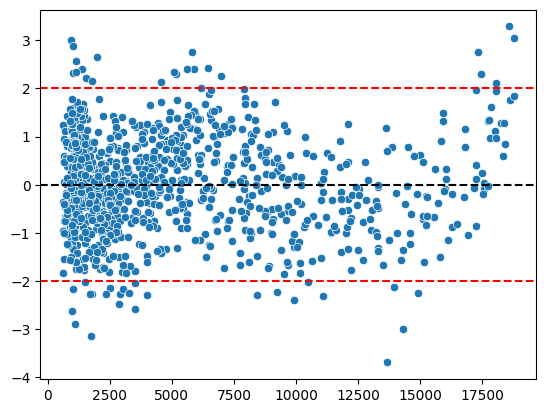

In [120]:
# Verificar a linearidade dos residuos, valores esperados entre -2 e 2
# Vamos verificar a homocedasticidade dos residuos: Valores em torno da reta sem nehuma tendencia ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(2, color='r', linestyle='--')
plt.axhline(-2, color='r', linestyle='--')
plt.axhline(0, color='black', linestyle='--')

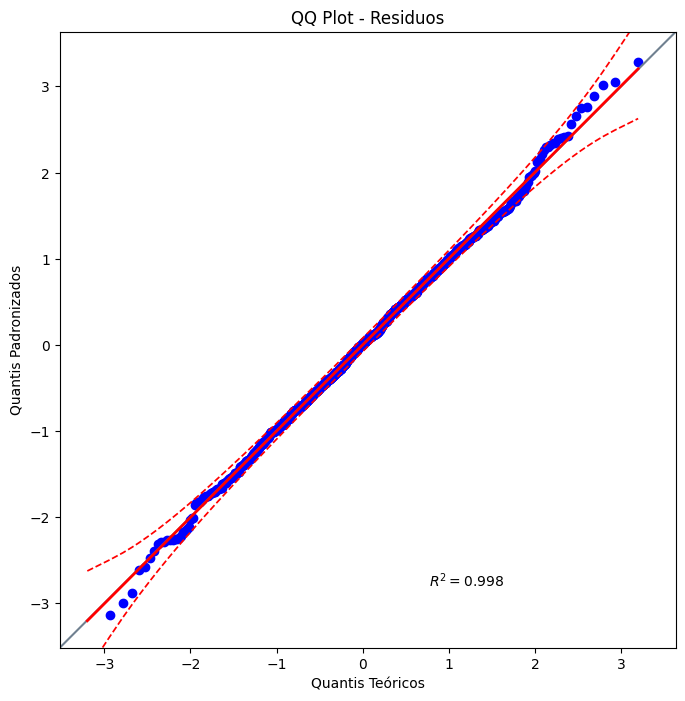

In [121]:
# Checar se residuos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14, 8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Padronizados')
plt.title('QQ Plot - Residuos')
plt.show()

In [122]:
# Teste de normalidade Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

# Teste de Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(residuos)
print(f'Shapiro-Wilk: Estatistica: {stat_shapiro}, P-value:{p_shapiro}')

Shapiro-Wilk: Estatistica: 0.9986951372205289, P-value:0.6852797159638004


Os residuos seguem uma distribuição normal 

In [123]:
# Teste de Kolmogorov-Smirnov
stat_kstest, p_kstest = kstest(residuos, 'norm')
print(f'Kolmogorov-Smirnov: Estatistica: {stat_kstest}, P-value:{p_kstest}')

Kolmogorov-Smirnov: Estatistica: 0.4823744649953392, P-value:1.2202460105710526e-214


Pelo Kol não seguem uma distribuição normal

In [124]:
# Teste de Lilliefors
stat_lilliefors, p_lilliefors = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f'Lilliefors: Estatistica: {stat_lilliefors}, P-value:{p_lilliefors}')

Lilliefors: Estatistica: 0.013637346894973312, P-value:0.956627002204744


Os resíduos seguem uma distribuição normal

## Realizar Predições Individuais

In [128]:
input_features = {
    "tempo_na_empresa": 72,
    "nivel_na_empresa": 1
}

pred_df = pd.DataFrame(input_features, index=[1])

In [129]:
# Fazer a predição de grau 4
model_poly.predict(pred_df)[0]

4381.55799682144

In [130]:
import joblib
# Salvar o modelo
joblib.dump(model_poly, './modelo_salario_pol.pkl')

['./modelo_salario_pol.pkl']